In [86]:
# MultiClassification
# Yunus Emre
# 12 Kasım 2018

# Matematik işlemler için gerekli
import numpy as np

# Görsel çizim ve çıktı için gerekli
import matplotlib.pyplot as plt

# Örnek verileri oluşturmak için gerekli
from sklearn import datasets

# Makine öğrenimi ve sinir ağları için gerekli
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

# Nokta sayısı
n = 500

# Oluşturulacak verilerin merkezleri
merkezler = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]

In [87]:
# Input ve Output'ların oluşturulması
# n_samples: Nokta sayısı
# random_state: Her derlemede aynı çıkan verilerin türü (123 = aynı)
# centers: Verilerin merkez noktaları
# cluster_std: Verilerin dağılma boyutu (0 olursa hepsi üst üste oluşur)
x , y = datasets.make_blobs(n_samples=n, random_state=123, centers=merkezler, cluster_std=0.4)

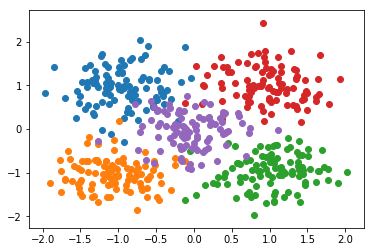

In [88]:
# Çizilecek verilerin grafiğe eklenmesi
# Mavi: 0, Turuncu: 1, Yeşil: 2, Kırmızı: 3, Mor: 4
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.scatter(x[y==3, 0], x[y==3, 1])
plt.scatter(x[y==4, 0], x[y==4, 1])

In [89]:
# 4, 3, 2, 1, 0 verilerini kodlanmış hale binary olarak yazar
# 4: 00001
# 3: 00010
# 2: 00100
# 1: 01000
# 0: 10000
y_cat = to_categorical(y, 5)

In [98]:
# Sinir ağı modelini oluşturma
model = Sequential()

# Katmanları oluşturma
# units: Nöron sayısı (Output çeşidi ile eş değerdir)
# input_shape: Input boyutu, yapısı
# activation: Eylem fonksiyonu (sigmoid yerine softmax)
model.add(Dense(units=5, input_shape=(2, ), activation='softmax'))

# Modeli yapılandırma ve optimize etme
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli çalıştırmak için değişkenleri atama
# batch_size: GPU bağlı işlem uzunluğu
model.fit(x=x, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 473us/step - loss: 1.2099 - acc: 0.4580
Epoch 2/100
500/500 [==============================] - 0s 17us/step - loss: 0.6106 - acc: 0.8540
Epoch 3/100
500/500 [==============================] - 0s 22us/step - loss: 0.4185 - acc: 0.9200
Epoch 4/100
500/500 [==============================] - 0s 22us/step - loss: 0.3362 - acc: 0.9380
Epoch 5/100
500/500 [==============================] - 0s 19us/step - loss: 0.2917 - acc: 0.9460
Epoch 6/100
500/500 [==============================] - 0s 20us/step - loss: 0.2674 - acc: 0.9420
Epoch 7/100
500/500 [==============================] - 0s 23us/step - loss: 0.2491 - acc: 0.9420
Epoch 8/100
500/500 [==============================] - 0s 20us/step - loss: 0.2354 - acc: 0.9400
Epoch 9/100
500/500 [==============================] - 0s 18us/step - loss: 0.2258 - acc: 0.9480
Epoch 10/100
500/500 [==============================] - 0s 20us/step - loss: 0.2175 - acc: 0.9420
Epoch 11/100
500/500 [======

In [91]:
# Tahminleri oluşturma
def plat_decision_boundary(x, y, model):
    # x,y dağılımlarını bulma (0.5 br daha uzun olacak çizgi)
    x_span = np.linspace(min(x[:, 0]) - 0.25, max(x[:, 0]) + 0.25)
    y_span = np.linspace(min(x[:, 1]) - 0.25, max(x[:, 1]) + 0.25)
    
    # Her x'e karşılık bir y değerinin geldiği matriksi oluşturma
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    tablo = np.c_[xx_, yy_]
    
    # Multiclass Data olduğu için predict_classes
    ongoru_metodu = model.predict_classes(tablo)
    z = ongoru_metodu.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

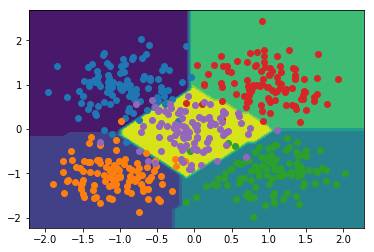

In [92]:
# Tahminleri oluşturma
plat_decision_boundary(x, y_cat, model)

# Çizilecek verilerin grafiğe eklenmesi
# Mavi: 0, Turuncu: 1, Yeşil: 2, Kırmızı: 3, Mor: 4
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.scatter(x[y==3, 0], x[y==3, 1])
plt.scatter(x[y==4, 0], x[y==4, 1])

Öngörüm:  [3]


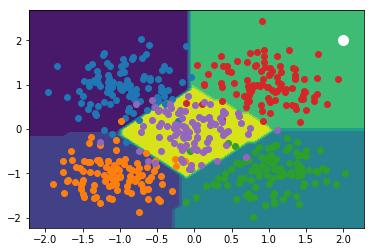

In [96]:
# Yeni veriyi kontrol etme

# Tahminleri oluşturma
plat_decision_boundary(x, y_cat, model)

# Çizilecek verilerin grafiğe eklenmesi
# Mavi: 0, Turuncu: 1, Yeşil: 2, Kırmızı: 3, Mor: 4
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.scatter(x[y==3, 0], x[y==3, 1])
plt.scatter(x[y==4, 0], x[y==4, 1])

x1 = 2
x2 = 2
nokta = np.array([[x1,x2]])
ongoru = model.predict_classes(nokta)
plt.plot([x1], [x2], marker='o', markersize=10, color='w')
print("Öngörüm: ", ongoru)